In [3]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

sns.set(style="whitegrid")
df = pd.read_csv("D:\Retail_store2.csv")
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


# Basic Data Inspection


In [4]:
print("--- Data Info ---")
df.info()

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows :{duplicates}")

print("\n--- Summary Statistics ---")
df.describe()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)


,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


# Data Prepricessing

In [5]:
df['Date'] = pd.to_datetime(df['Date'])


#check the date range
print(f"Data ranges from {df['Date'].min()} to {df['Date'].max()}")

Data ranges from 2022-01-01 00:00:00 to 2024-01-01 00:00:00


# Distribution of Numerical Variables

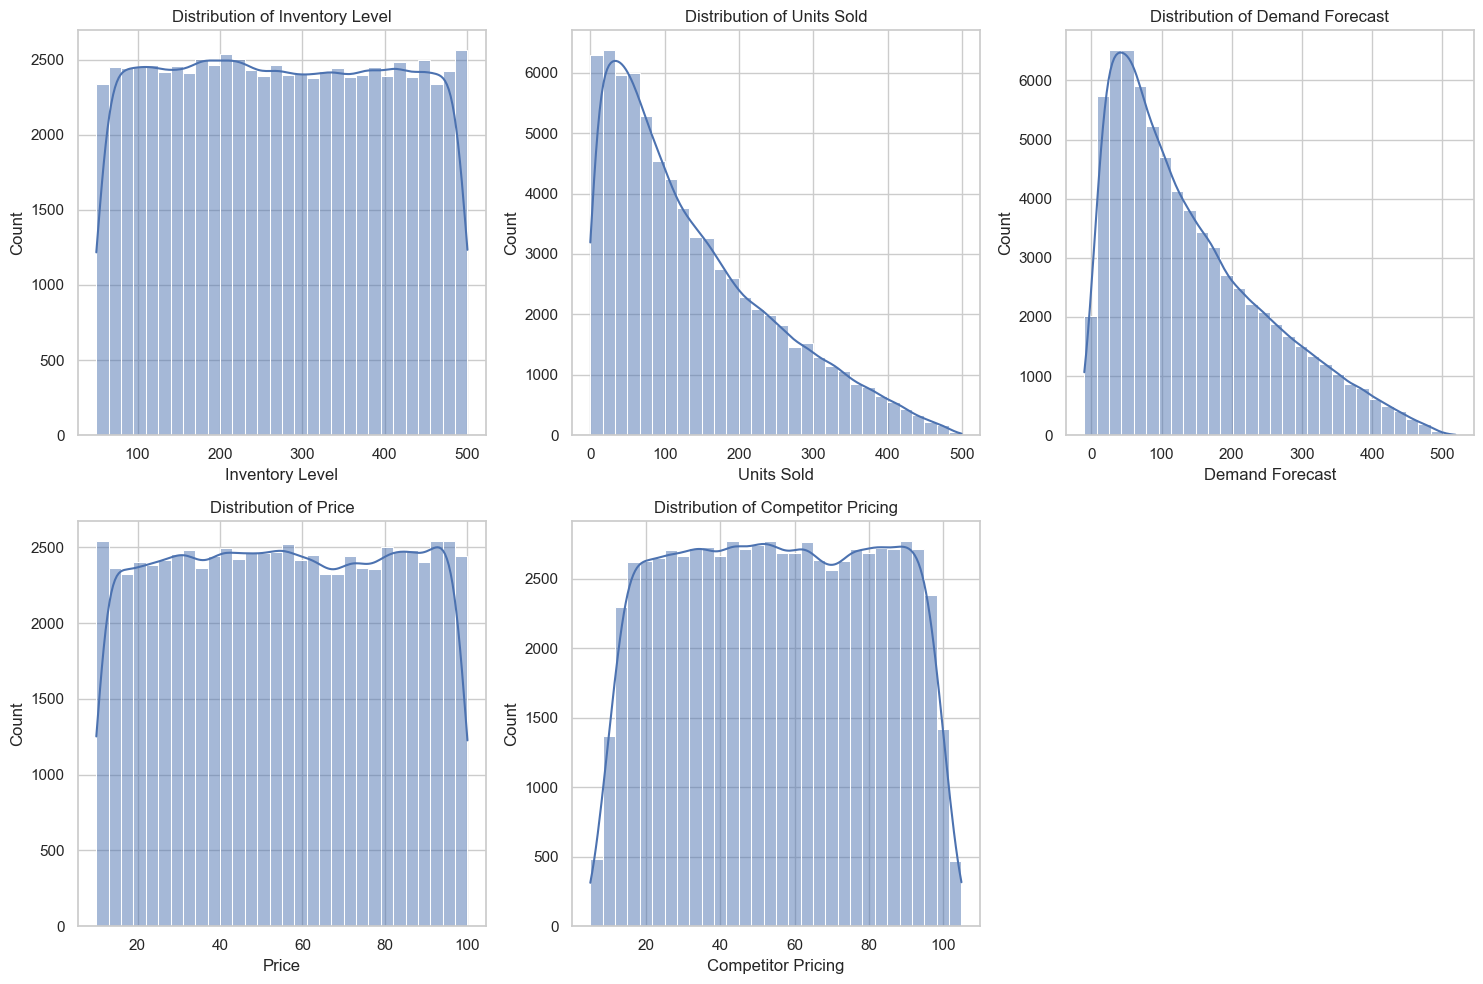

In [6]:
num_cols = ['Inventory Level','Units Sold','Demand Forecast','Price','Competitor Pricing']

#Plot distibutions
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Categorical Variable Analysis

C:\Users\prade\AppData\Local\Temp\ipykernel_13444\1615941696.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,order=df[col].value_counts().index,palette='viridis')
C:\Users\prade\AppData\Local\Temp\ipykernel_13444\1615941696.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,order=df[col].value_counts().index,palette='viridis')
C:\Users\prade\AppData\Local\Temp\ipykernel_13444\1615941696.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,order=df[col].value_counts().index,palette='viridis'

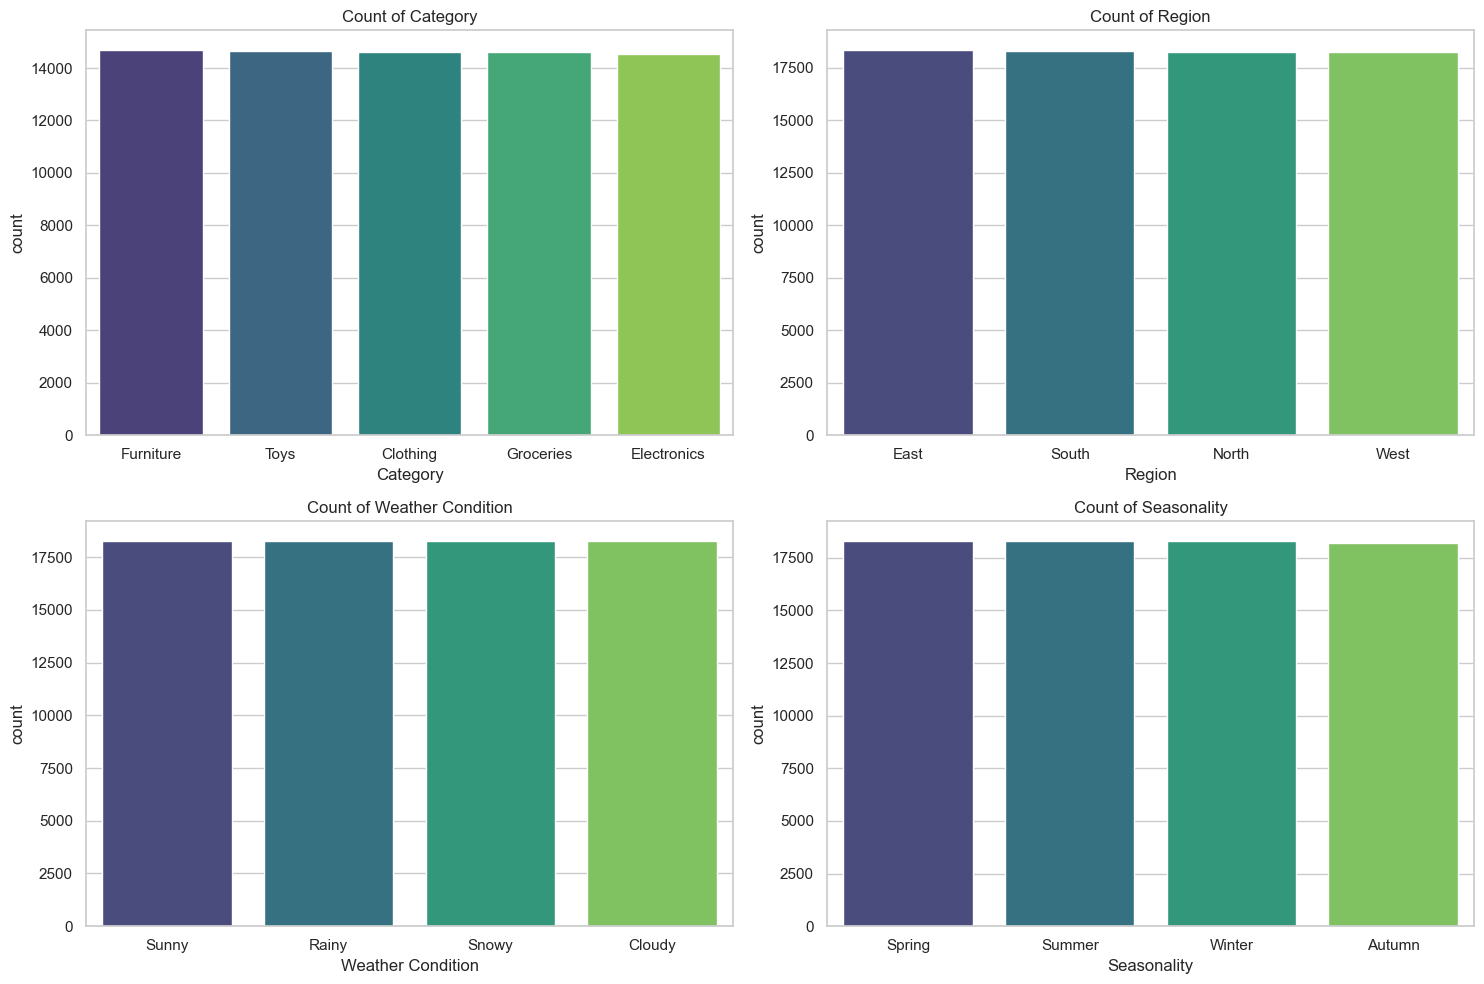

In [7]:
cat_cols = ['Category','Region','Weather Condition','Seasonality']

plt.figure(figsize=(15,10))
for i, col in enumerate(cat_cols):
    plt.subplot(2,2,i+1)
    sns.countplot(data=df,x=col,order=df[col].value_counts().index,palette='viridis')
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

# Correlation Analysis


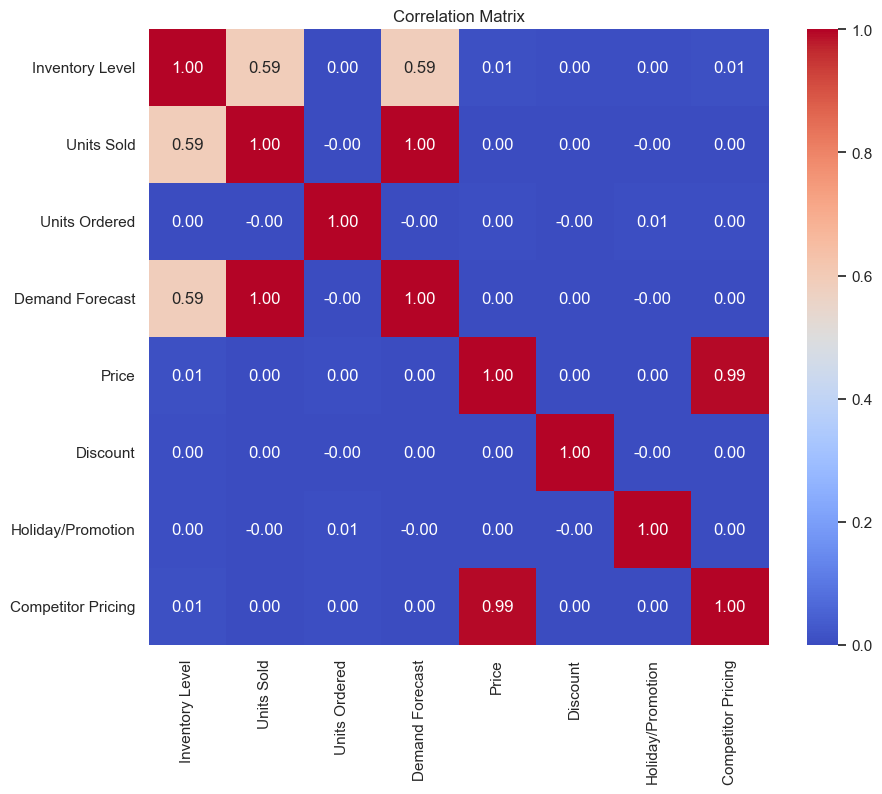

In [8]:
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=['float64','int64'])
corr_matrix = numeric_df.corr()


sns.heatmap(corr_matrix, annot = True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Time Series Analysis(Monthly Sales)

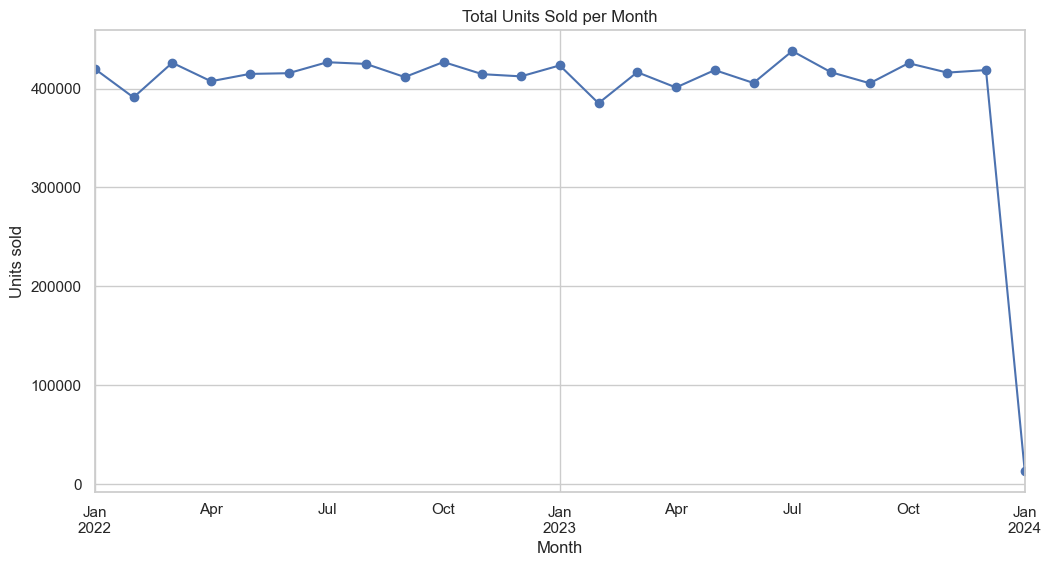

In [9]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Units Sold'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o',linestyle='-')
plt.title('Total Units Sold per Month')
plt.xlabel('Month')
plt.ylabel('Units sold')
plt.grid(True)
plt.show()